In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
data = pd.read_csv("20240227-hra-bigquery-export.csv")

In [3]:
data.head(-10)

,user_pseudo_id,hostname,page_location,event_date,user_first_touch_timestamp,event_timestamp,event_name,event_category,event_label
0,1.020873e+09,sennetconsortium.github.io,https://sennetconsortium.github.io/ccf-preview...,20240226,1.708970e+15,1.708970e+15,first_visit,NaN,NaN
1,1.020873e+09,sennetconsortium.github.io,https://sennetconsortium.github.io/ccf-preview...,20240226,1.708970e+15,1.708970e+15,session_start,NaN,NaN
2,1.020873e+09,sennetconsortium.github.io,https://sennetconsortium.github.io/ccf-preview...,20240226,1.708970e+15,1.708970e+15,page_view,NaN,NaN
3,1.020873e+09,sennetconsortium.github.io,https://sennetconsortium.github.io/ccf-preview...,20240226,1.708970e+15,1.708970e+15,scroll,NaN,NaN
4,1.020873e+09,sennetconsortium.github.io,https://sennetconsortium.github.io/ccf-preview...,20240226,1.708970e+15,1.708970e+15,webpage,mousemove,996_226_1439_697
...,...,...,...,...,...,...,...,...,...
192256,9.130261e+08,portal.hubmapconsortium.org,https://portal.hubmapconsortium.org/ccf-eui,20231229,1.703840e+15,1.703840e+15,nodes_selected,ontology_tree,Biomarkers
192257,9.130261e+08,portal.hubmapconsortium.org,https://portal.hubmapconsortium.org/ccf-eui,20231229,1.703840e+15,1.703840e+15,nodes_selected_by_ids,ontology_tree,Biomarkers
192258,9.130261e+08,portal.hubmapconsortium.org,https://portal.hubmapconsortium.org/ccf-eui,20231229,1.703840e+15,1.703840e+15,nodes_selected,ontology_tree,Biomarkers
192259,9.130261e+08,portal.hubmapconsortium.org,https://portal.hubmapconsortium.org/ccf-eui,20231229,1.703840e+15,1.703840e+15,nodes_selected_by_ids,ontology_tree,body


In [4]:
rows, columns = data.shape
print("Rows count:", rows)
print("Columns count:", columns)

Rows count: 192271
Columns count: 9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192271 entries, 0 to 192270
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   user_pseudo_id              192271 non-null  float64
 1   hostname                    192271 non-null  object 
 2   page_location               192271 non-null  object 
 3   event_date                  192271 non-null  int64  
 4   user_first_touch_timestamp  188804 non-null  float64
 5   event_timestamp             192271 non-null  float64
 6   event_name                  192271 non-null  object 
 7   event_category              165773 non-null  object 
 8   event_label                 155728 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 13.2+ MB


### Here we converted the date and time to human-readable datetime format

In [6]:
data['event_date'] = pd.to_datetime(data['event_date'], format='%Y%m%d')
data.head()

,user_pseudo_id,hostname,page_location,event_date,user_first_touch_timestamp,event_timestamp,event_name,event_category,event_label
0,1.020873e+09,sennetconsortium.github.io,https://sennetconsortium.github.io/ccf-preview...,2024-02-26,1.708970e+15,1.708970e+15,first_visit,NaN,NaN
1,1.020873e+09,sennetconsortium.github.io,https://sennetconsortium.github.io/ccf-preview...,2024-02-26,1.708970e+15,1.708970e+15,session_start,NaN,NaN
2,1.020873e+09,sennetconsortium.github.io,https://sennetconsortium.github.io/ccf-preview...,2024-02-26,1.708970e+15,1.708970e+15,page_view,NaN,NaN
3,1.020873e+09,sennetconsortium.github.io,https://sennetconsortium.github.io/ccf-preview...,2024-02-26,1.708970e+15,1.708970e+15,scroll,NaN,NaN
4,1.020873e+09,sennetconsortium.github.io,https://sennetconsortium.github.io/ccf-preview...,2024-02-26,1.708970e+15,1.708970e+15,webpage,mousemove,996_226_1439_697


In [7]:
data['user_first_touch_timestamp'] = pd.to_datetime(data['user_first_touch_timestamp'], unit='us')
data['event_timestamp'] = pd.to_datetime(data['event_timestamp'], unit='us')
data.head()

C:\Users\Jeet Patel\anaconda3\Lib\site-packages\pandas\core\tools\datetimes.py:557: RuntimeWarning: invalid value encountered in cast
  arr, tz_parsed = tslib.array_with_unit_to_datetime(arg, unit, errors=errors)


,user_pseudo_id,hostname,page_location,event_date,user_first_touch_timestamp,event_timestamp,event_name,event_category,event_label
0,1.020873e+09,sennetconsortium.github.io,https://sennetconsortium.github.io/ccf-preview...,2024-02-26,2024-02-26 17:53:20,2024-02-26 17:53:20,first_visit,NaN,NaN
1,1.020873e+09,sennetconsortium.github.io,https://sennetconsortium.github.io/ccf-preview...,2024-02-26,2024-02-26 17:53:20,2024-02-26 17:53:20,session_start,NaN,NaN
2,1.020873e+09,sennetconsortium.github.io,https://sennetconsortium.github.io/ccf-preview...,2024-02-26,2024-02-26 17:53:20,2024-02-26 17:53:20,page_view,NaN,NaN
3,1.020873e+09,sennetconsortium.github.io,https://sennetconsortium.github.io/ccf-preview...,2024-02-26,2024-02-26 17:53:20,2024-02-26 17:53:20,scroll,NaN,NaN
4,1.020873e+09,sennetconsortium.github.io,https://sennetconsortium.github.io/ccf-preview...,2024-02-26,2024-02-26 17:53:20,2024-02-26 17:53:20,webpage,mousemove,996_226_1439_697


In [8]:
data.head()

,user_pseudo_id,hostname,page_location,event_date,user_first_touch_timestamp,event_timestamp,event_name,event_category,event_label
0,1.020873e+09,sennetconsortium.github.io,https://sennetconsortium.github.io/ccf-preview...,2024-02-26,2024-02-26 17:53:20,2024-02-26 17:53:20,first_visit,NaN,NaN
1,1.020873e+09,sennetconsortium.github.io,https://sennetconsortium.github.io/ccf-preview...,2024-02-26,2024-02-26 17:53:20,2024-02-26 17:53:20,session_start,NaN,NaN
2,1.020873e+09,sennetconsortium.github.io,https://sennetconsortium.github.io/ccf-preview...,2024-02-26,2024-02-26 17:53:20,2024-02-26 17:53:20,page_view,NaN,NaN
3,1.020873e+09,sennetconsortium.github.io,https://sennetconsortium.github.io/ccf-preview...,2024-02-26,2024-02-26 17:53:20,2024-02-26 17:53:20,scroll,NaN,NaN
4,1.020873e+09,sennetconsortium.github.io,https://sennetconsortium.github.io/ccf-preview...,2024-02-26,2024-02-26 17:53:20,2024-02-26 17:53:20,webpage,mousemove,996_226_1439_697


In [ ]:
# Save the modified dataset to a new CSV file
modified_file_path = 'modified_20240227-hra-bigquery-export_changes.csv'
data.to_csv(modified_file_path, index=False)
modified_file_path

## Checking the missing values

In [9]:
data.isnull().sum()

user_pseudo_id                    0
hostname                          0
page_location                     0
event_date                        0
user_first_touch_timestamp     3467
event_timestamp                   0
event_name                        0
event_category                26498
event_label                   36543
dtype: int64

**A deliberate decision was made not to remove rows with null values in this particular field. This decision was grounded in the principle of preserving the breadth and depth of the dataset for comprehensive analysis. Removing these rows could eliminate valuable information encapsulated in the other fields, thereby skewing the analysis and insights derived from the data.**

## Visualizations

## Distribution of Visits Among the Five Most Visited Websites

In [12]:
unique_users_count = data['user_pseudo_id'].nunique()
non_unique_users_count = len(data) - unique_users_count

visits_per_website = data['hostname'].value_counts()

top_5_websites = visits_per_website.head(5)

unique_non_unique_users_count = {"Unique Users": unique_users_count, "Non-Unique Users": non_unique_users_count}
top_5_websites, unique_non_unique_users_count


(localhost                      50408
 hubmapconsortium.github.io     35408
 ingest.hubmapconsortium.org    28817
 apps.humanatlas.io             23975
 portal.hubmapconsortium.org    22367
 Name: hostname, dtype: int64,
 {'Unique Users': 1977, 'Non-Unique Users': 190294})

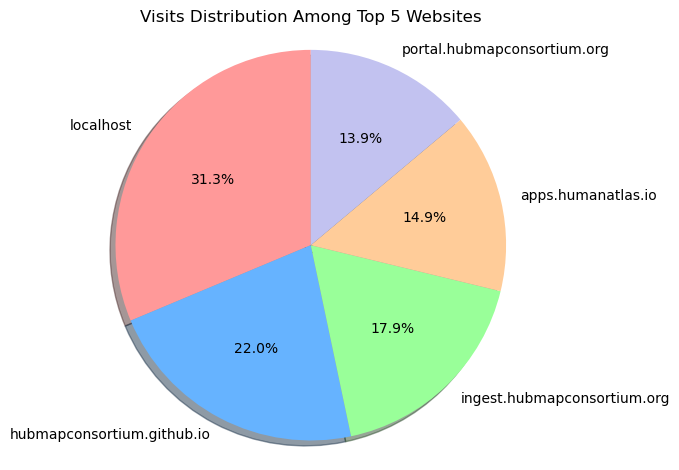

In [14]:
labels = top_5_websites.index
sizes = top_5_websites.values
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  

plt.title('Visits Distribution Among Top 5 Websites')
plt.tight_layout()
plt.show()


## Trend of Visits Over Time

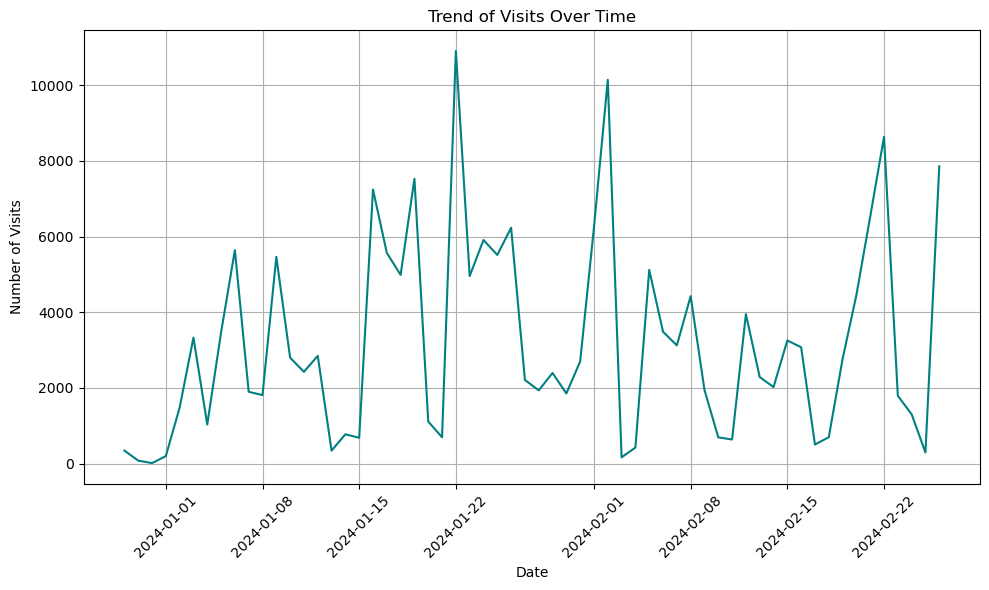

In [15]:

data['event_date'] = pd.to_datetime(data['event_date'], dayfirst=True)
visits_over_time = data.groupby(data['event_date'].dt.date).size()

# Plotting Trend of Visits Over Time
plt.figure(figsize=(10, 6))
visits_over_time.plot(kind='line', color='teal')
plt.title('Trend of Visits Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## First Visit Time Distribution


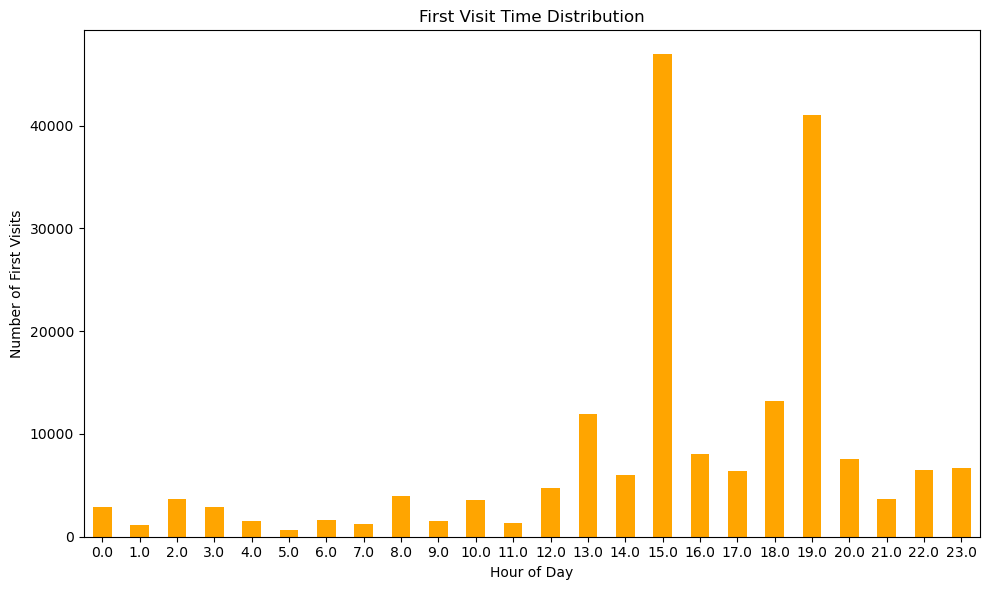

In [17]:
data['user_first_touch_timestamp'] = pd.to_datetime(data['user_first_touch_timestamp'], format='%d-%m-%Y %H:%M')
data['first_visit_hour'] = data['user_first_touch_timestamp'].dt.hour
# Count first visits per hour
first_visit_distribution = data.groupby('first_visit_hour').size()
plt.figure(figsize=(10, 6))
first_visit_distribution.plot(kind='bar', color='orange')
plt.title('First Visit Time Distribution')
plt.xlabel('Hour of Day')
plt.ylabel('Number of First Visits')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()